# Homework 3

Spencer Pease  
ASTR 427

----------------------------

In [2]:
# Imports

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [44]:
# Bisection method

def bisection(a, b):
    """
    """
    c = (a + b)/2
    return c

In [45]:
# Newton-Raphson method

def newton(x0, fx0, dfx0):
    """
    """
    x = x0 - (fx0/dfx0)
    return x

Simple test case:  
  
$x^{2} = z$

In [74]:
# (1a) general

z = 2
def f1(x):
    return x**2 - z

In [89]:
# (1a) bisection

c_val = []
fc_val = []

a = -1.
b = 3.

i1 = 0
while np.abs(b - a) > 1e-4:
    i1 += 1
    c = bisection(a, b)
    fc = f1(c)
    
    c_val.append(c)
    fc_val.append(fc)
    
    if f1(a) * fc < 0:
        b = c
    elif f1(b) * fc < 0:
        a = c
    else:
        break

c_val = np.array(c_val)
fc_val = np.array(fc_val)

In [102]:
# (1a) newton

def df1(x):
    """
    """
    return 2*x

x0 = 1.

x_val = [x0]
fx_val = [f1(x0)]

i2 = 0
while np.abs(f1(x0)) > 1e-4:
    i2 += 1
    
    fx0 = fx_val[-1]
    dfx0 = df1(x_val[-1])
    
    x_new = newton(x0, fx0, dfx0)
    
    x_val.append(x_new)
    fx_val.append(f1(x_new))
    
    x0 = x_val[-1]

x_val = np.array(x_val)
fx_val = np.array(fx_val)

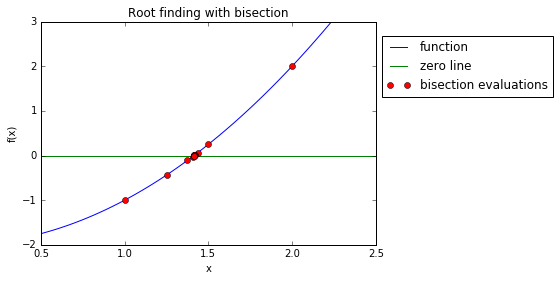

final value: 9.06325876713e-05
iterations: 16




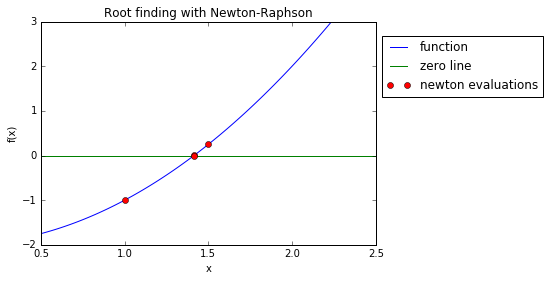

final value: 6.00730488287e-06
iterations: 3


In [103]:
# (1a) plotting

x = np.linspace(.5, 2.5, 100)

# plot of bisection method
plt.figure(1)
plt.xlim(.5, 2.5)
plt.ylim(-2, 3)
plt.plot(x, f1(x), label='function')
plt.plot(x, [0]*x, label='zero line')
plt.plot(c_val, fc_val, marker='o', linestyle='none', label='bisection evaluations')

plt.title('Root finding with bisection')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

print "final value:", fc_val[-1]
print "iterations:", i1
print '\n'


# plot of newton method
plt.figure(2)
plt.xlim(.5, 2.5)
plt.ylim(-2, 3)
plt.plot(x, f1(x), label='function')
plt.plot(x, [0]*x, label='zero line')
plt.plot(x_val, fx_val, marker='o', linestyle='none', label='newton evaluations')

plt.title('Root finding with Newton-Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

print "final value:", fx_val[-1]
print "iterations:", i2

Kepler's equation:  
  
$M = E - e\sin(E)$

In [93]:
# (1b)

def kepler(E, e, M):
    return E - e*np.sin(E) - M

## Problem 2